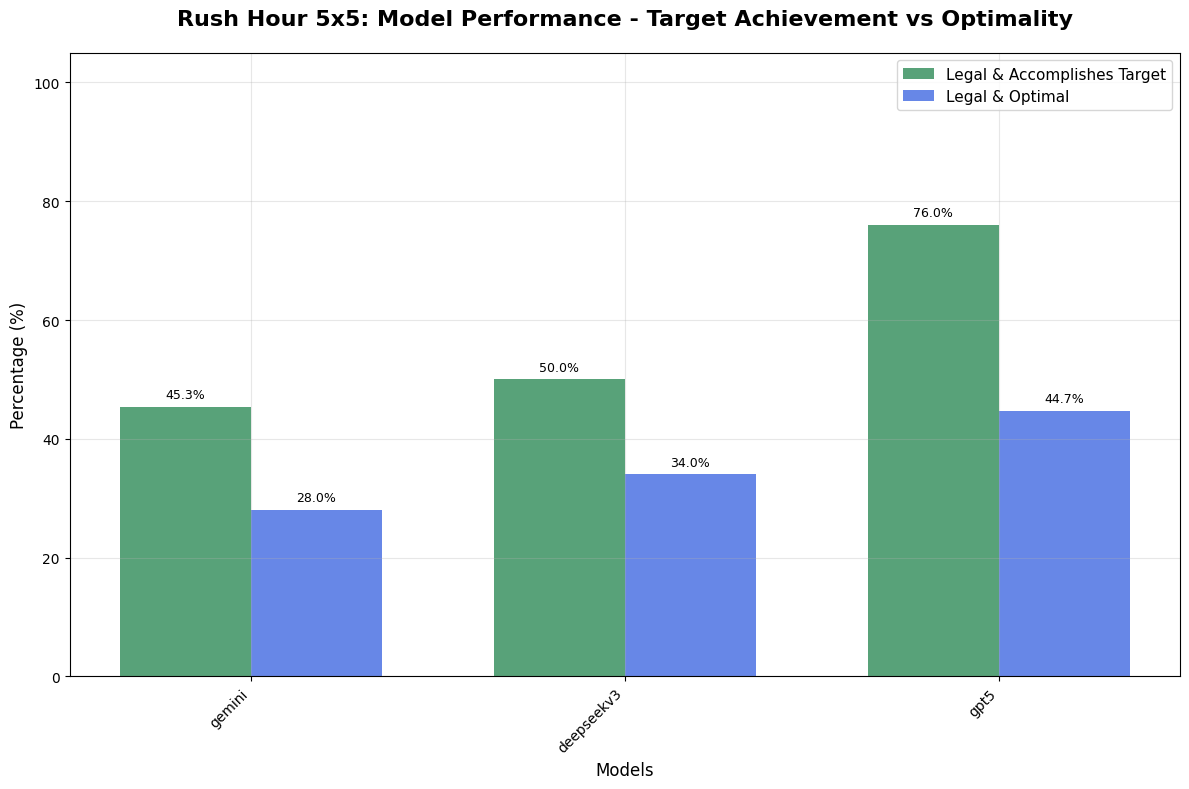

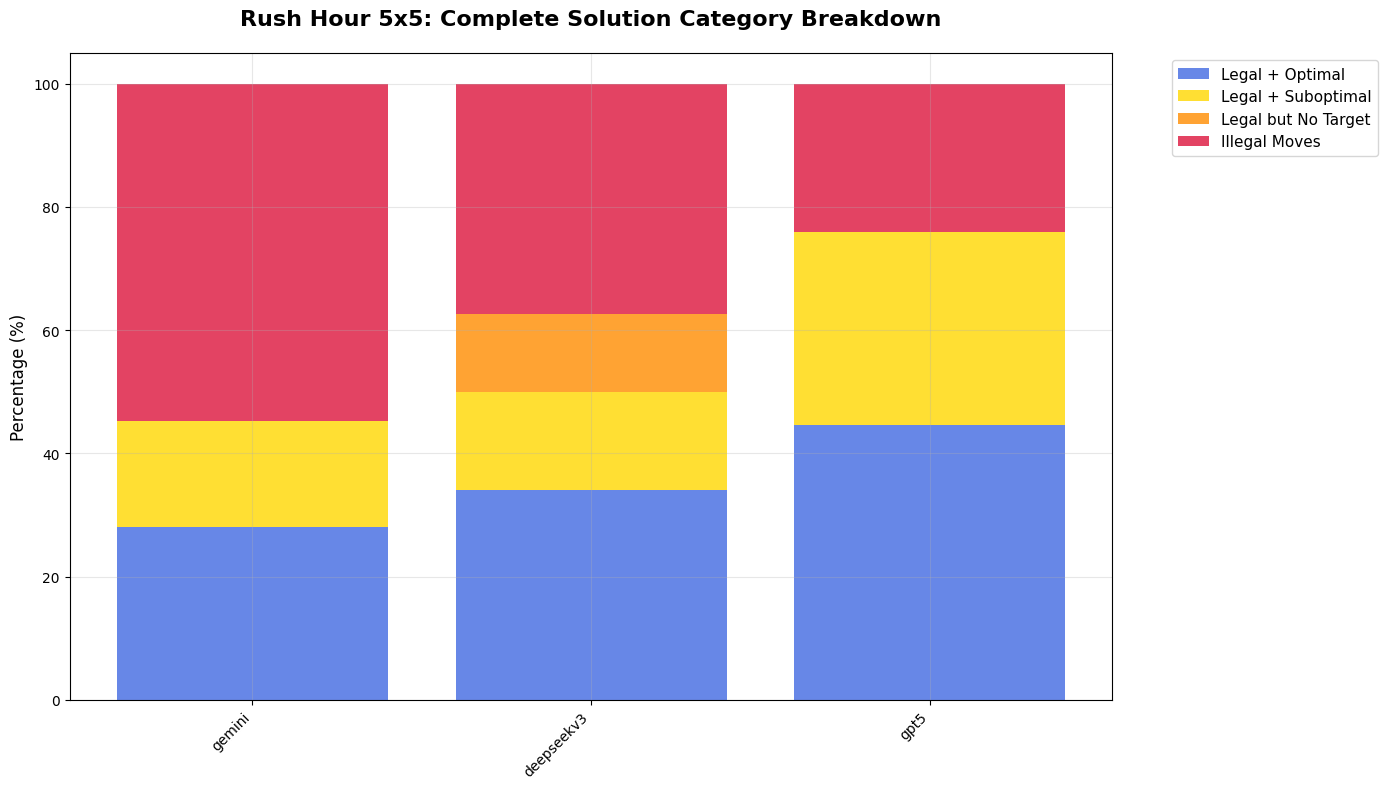

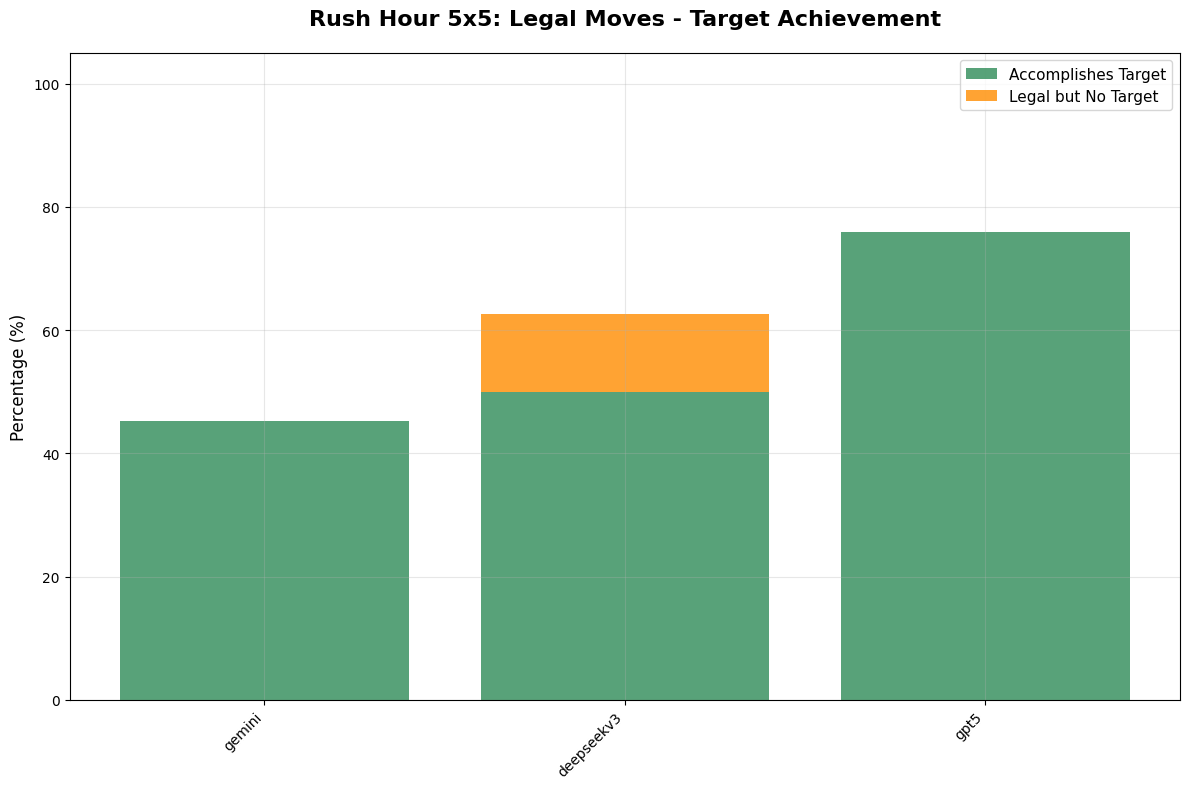

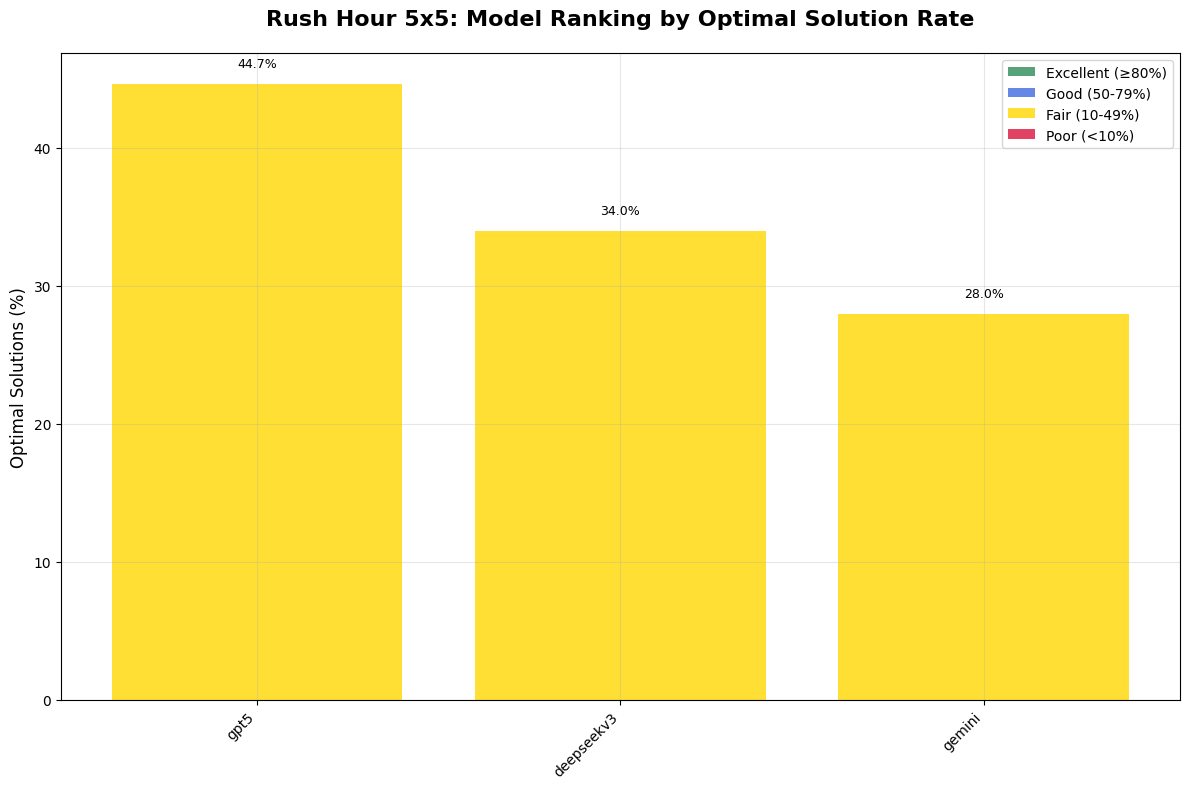

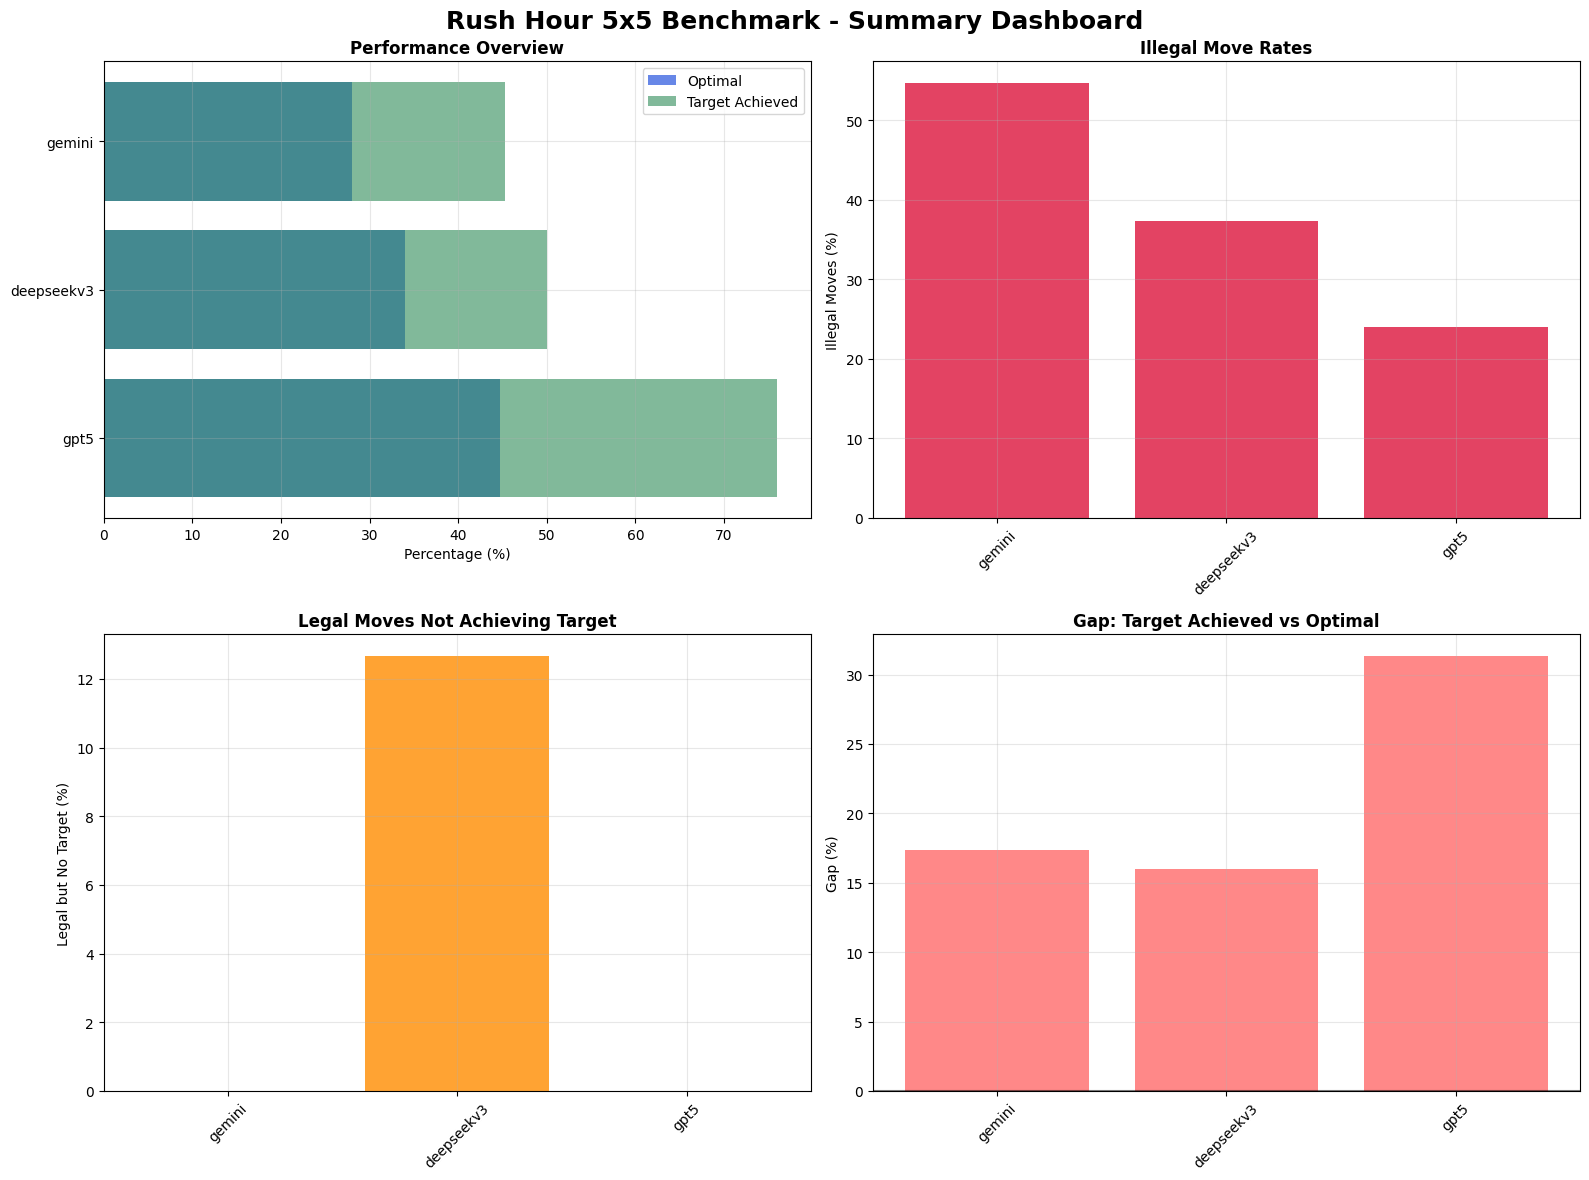

RUSH HOUR 5x5 BENCHMARK RESULTS
Total Models Analyzed: 3
Average Legal & Accomplishes Target Rate: 57.1%
Average Legal & Optimal Rate: 35.6%
Standard Deviation (Optimal): 8.4%

PERFORMANCE RANKINGS:
----------------------------------------
 1. gpt5            -  44.7% optimal,  76.0% target achieved
 2. deepseekv3      -  34.0% optimal,  50.0% target achieved
 3. gemini          -  28.0% optimal,  45.3% target achieved

CATEGORY BREAKDOWN:
--------------------
gpt5:
  Legal & Optimal:  44.7%
  Legal & Suboptimal:  31.3%
  Legal but No Target:   0.0%
  Illegal Moves:  24.0%

deepseekv3:
  Legal & Optimal:  34.0%
  Legal & Suboptimal:  16.0%
  Legal but No Target:  12.7%
  Illegal Moves:  37.3%

gemini:
  Legal & Optimal:  28.0%
  Legal & Suboptimal:  17.3%
  Legal but No Target:   0.0%
  Illegal Moves:  54.7%


All plots saved to 'rush_hour_5x5_plots' directory:
1. 1_performance_comparison_5x5.png - Target Achievement vs Optimality
2. 2_category_breakdown_5x5.png - Complete Solution Cat

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import os

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create output directory for images
output_dir = "rush_hour_5x5_plots"
os.makedirs(output_dir, exist_ok=True)

# Load the results file
results_file = "5x5_validation_results.json"  # Change to your file path
with open(results_file, 'r') as f:
    data = json.load(f)

# Extract model performance data with new categories
models = []
legal_accomplishes_target_percentages = []
legal_optimal_percentages = []
illegal_percentages = []
legal_no_target_percentages = []
legal_suboptimal_percentages = []

for model_name, model_data in data['models'].items():
    models.append(model_name)
    legal_accomplishes_target_percentages.append(model_data.get('legal_accomplishes_target_percentage', 0))
    legal_optimal_percentages.append(model_data.get('legal_optimal_target_percentage', 0))
    illegal_percentages.append(model_data.get('illegal_percentage', 0))
    legal_no_target_percentages.append(model_data.get('legal_no_target_percentage', 0))
    legal_suboptimal_percentages.append(model_data.get('legal_suboptimal_percentage', 0))

# Create DataFrame for easier manipulation
df = pd.DataFrame({
    'Model': models,
    'Legal_Accomplishes_Target': legal_accomplishes_target_percentages,
    'Legal_Optimal': legal_optimal_percentages,
    'Illegal_Moves': illegal_percentages,
    'Legal_No_Target': legal_no_target_percentages,
    'Legal_Suboptimal': legal_suboptimal_percentages
})

# Sort by optimal percentage for better visualization
df = df.sort_values('Legal_Optimal', ascending=True)

# ============================================================================
# PLOT 1: Overall Performance Comparison (Bar Chart)
# ============================================================================
plt.figure(figsize=(12, 8))
x = np.arange(len(df))
width = 0.35

bars1 = plt.bar(x - width/2, df['Legal_Accomplishes_Target'], width, 
                label='Legal & Accomplishes Target', alpha=0.8, color='#2E8B57')
bars2 = plt.bar(x + width/2, df['Legal_Optimal'], width, 
                label='Legal & Optimal', alpha=0.8, color='#4169E1')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Rush Hour 5x5: Model Performance - Target Achievement vs Optimality', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, df['Model'], rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim(0, 105)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '1_performance_comparison_5x5.png'), dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PLOT 2: Four-Category Breakdown (Stacked Bar Chart)
# ============================================================================
plt.figure(figsize=(14, 8))
bars_optimal = plt.bar(df['Model'], df['Legal_Optimal'], 
                       label='Legal + Optimal', alpha=0.8, color='#4169E1')
bars_suboptimal = plt.bar(df['Model'], df['Legal_Suboptimal'], 
                          bottom=df['Legal_Optimal'],
                          label='Legal + Suboptimal', alpha=0.8, color='#FFD700')
bars_no_target = plt.bar(df['Model'], df['Legal_No_Target'], 
                         bottom=df['Legal_Optimal'] + df['Legal_Suboptimal'],
                         label='Legal but No Target', alpha=0.8, color='#FF8C00')
bars_illegal = plt.bar(df['Model'], df['Illegal_Moves'], 
                       bottom=df['Legal_Optimal'] + df['Legal_Suboptimal'] + df['Legal_No_Target'],
                       label='Illegal Moves', alpha=0.8, color='#DC143C')

plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Rush Hour 5x5: Complete Solution Category Breakdown', fontsize=16, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '2_category_breakdown_5x5.png'), dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PLOT 3: Legal Solutions Breakdown
# ============================================================================
plt.figure(figsize=(12, 8))
bars_legal_target = plt.bar(df['Model'], df['Legal_Accomplishes_Target'], 
                            label='Accomplishes Target', alpha=0.8, color='#2E8B57')
bars_legal_no_target = plt.bar(df['Model'], df['Legal_No_Target'], 
                               bottom=df['Legal_Accomplishes_Target'],
                               label='Legal but No Target', alpha=0.8, color='#FF8C00')

plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Rush Hour 5x5: Legal Moves - Target Achievement', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '3_legal_solutions_breakdown_5x5.png'), dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PLOT 4: Model Ranking and Gap Analysis
# ============================================================================
plt.figure(figsize=(12, 8))
sorted_df = df.sort_values('Legal_Optimal', ascending=False)
bars = plt.bar(sorted_df['Model'], sorted_df['Legal_Optimal'], 
               color=['#2E8B57' if x >= 80 else '#4169E1' if x >= 50 else '#FFD700' if x >= 10 else '#DC143C' 
                     for x in sorted_df['Legal_Optimal']], alpha=0.8)

plt.title('Rush Hour 5x5: Model Ranking by Optimal Solution Rate', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Optimal Solutions (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Add color legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2E8B57', alpha=0.8, label='Excellent (≥80%)'),
                   Patch(facecolor='#4169E1', alpha=0.8, label='Good (50-79%)'),
                   Patch(facecolor='#FFD700', alpha=0.8, label='Fair (10-49%)'),
                   Patch(facecolor='#DC143C', alpha=0.8, label='Poor (<10%)')]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '4_model_ranking_5x5.png'), dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# BONUS PLOT 5: Summary Dashboard (All key metrics in one view)
# ============================================================================
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Performance comparison (simplified)
sorted_df_perf = df.sort_values('Legal_Optimal', ascending=False)
ax1.barh(sorted_df_perf['Model'], sorted_df_perf['Legal_Optimal'], 
         color='#4169E1', alpha=0.8, label='Optimal')
ax1.barh(sorted_df_perf['Model'], sorted_df_perf['Legal_Accomplishes_Target'], 
         color='#2E8B57', alpha=0.6, label='Target Achieved')
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Performance Overview', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top-right: Illegal moves rate
ax2.bar(df['Model'], df['Illegal_Moves'], color='#DC143C', alpha=0.8)
ax2.set_ylabel('Illegal Moves (%)')
ax2.set_title('Illegal Move Rates', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Bottom-left: Legal but no target rate
ax3.bar(df['Model'], df['Legal_No_Target'], color='#FF8C00', alpha=0.8)
ax3.set_ylabel('Legal but No Target (%)')
ax3.set_title('Legal Moves Not Achieving Target', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Bottom-right: Gap between target achieved and optimal
gap_data = df['Legal_Accomplishes_Target'] - df['Legal_Optimal']
colors = ['#FF6B6B' if x > 0 else '#90EE90' for x in gap_data]
ax4.bar(df['Model'], gap_data, color=colors, alpha=0.8)
ax4.set_ylabel('Gap (%)')
ax4.set_title('Gap: Target Achieved vs Optimal', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax4.grid(True, alpha=0.3)

plt.suptitle('Rush Hour 5x5 Benchmark - Summary Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '5_summary_dashboard_5x5.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("="*60)
print("RUSH HOUR 5x5 BENCHMARK RESULTS")
print("="*60)
print(f"Total Models Analyzed: {len(df)}")
print(f"Average Legal & Accomplishes Target Rate: {df['Legal_Accomplishes_Target'].mean():.1f}%")
print(f"Average Legal & Optimal Rate: {df['Legal_Optimal'].mean():.1f}%")
print(f"Standard Deviation (Optimal): {df['Legal_Optimal'].std():.1f}%")
print()

print("PERFORMANCE RANKINGS:")
print("-" * 40)
ranking_df = df.sort_values('Legal_Optimal', ascending=False)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    print(f"{i:2d}. {row['Model']:<15} - {row['Legal_Optimal']:5.1f}% optimal, {row['Legal_Accomplishes_Target']:5.1f}% target achieved")

print("\nCATEGORY BREAKDOWN:")
print("-" * 20)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    print(f"{row['Model']}:")
    print(f"  Legal & Optimal: {row['Legal_Optimal']:5.1f}%")
    print(f"  Legal & Suboptimal: {row['Legal_Suboptimal']:5.1f}%")
    print(f"  Legal but No Target: {row['Legal_No_Target']:5.1f}%")
    print(f"  Illegal Moves: {row['Illegal_Moves']:5.1f}%")
    print()

print(f"\nAll plots saved to '{output_dir}' directory:")
print("1. 1_performance_comparison_5x5.png - Target Achievement vs Optimality")
print("2. 2_category_breakdown_5x5.png - Complete Solution Category Breakdown")
print("3. 3_legal_solutions_breakdown_5x5.png - Legal Moves Target Achievement")
print("4. 4_model_ranking_5x5.png - Model Ranking by Optimal Solution Rate")
print("5. 5_summary_dashboard_5x5.png - Summary Dashboard (Bonus)")
print("\nVisualization complete!")